In [1]:
import pandas as pd

In [29]:
index = pd.read_parquet("./parquet/index.parquet")

In [28]:
index.drop(["index", "Unnamed: 0"], axis=1).to_parquet("./parquet/index.parquet", compression="snappy")

In [30]:
index.head()

,identifier,domain,language,type,size_kb,type.1
0,sangraha/crawls_29-5-2023/html/kannada/kannada...,kannada_momspresso,kannada,html,15.8789,None
1,sangraha/crawls_29-5-2023/html/kannada/kannada...,kannada_momspresso,kannada,html,6.9629,None
2,sangraha/crawls_29-5-2023/html/kannada/kannada...,kannada_momspresso,kannada,html,33.8877,None
3,sangraha/crawls_29-5-2023/html/kannada/kannada...,kannada_momspresso,kannada,html,17.2715,None
4,sangraha/crawls_29-5-2023/html/kannada/kannada...,kannada_momspresso,kannada,html,6.8721,None


In [31]:
len(index)

22248633

In [32]:
import glob

In [33]:
par_files = glob.glob("./parquet/*/*.parquet")

In [34]:
par_files[0]

'./parquet/kannada/bigtvnews.parquet'

In [35]:
len(par_files)

1959

In [36]:
import os

In [37]:
languages = tuple(map(lambda x: os.path.split(x)[1] ,glob.glob("./parquet/*")))

In [38]:
languages

('kannada',
 'gujarati',
 'index.parquet',
 'english',
 'bengali',
 'telugu',
 'marathi',
 'bodo',
 'sindhi',
 'assamese',
 'hindi',
 'odia',
 'malayalam',
 'nepali',
 'tamil',
 'urdu',
 'sanskrit',
 'punjabi')

In [39]:
lang_stats_df = pd.DataFrame(columns=["language", "domain_count", "article_count"])
for lang in languages:
    domains_per_lang = glob.glob(f"./parquet/{lang}/*.parquet")
    article_count = 0
    for par_file in domains_per_lang:
        df = pd.read_parquet(par_file)
        article_count += len(df)
    lang_stats_df.loc[len(lang_stats_df)] = {"language": lang, "domain_count": len(domains_per_lang), "article_count": article_count}

In [41]:
lang_stats_df = lang_stats_df.drop([2]).reset_index().drop(["index"], axis=1)

In [42]:
lang_stats_df

,language,domain_count,article_count
0,kannada,68,1856177
1,gujarati,140,2213541
2,english,72,1427651
3,bengali,180,3109402
4,telugu,24,786624
5,marathi,32,758623
6,bodo,3,2957
7,sindhi,1,7018
8,assamese,33,725421
9,hindi,107,1744715


<Axes: xlabel='language'>

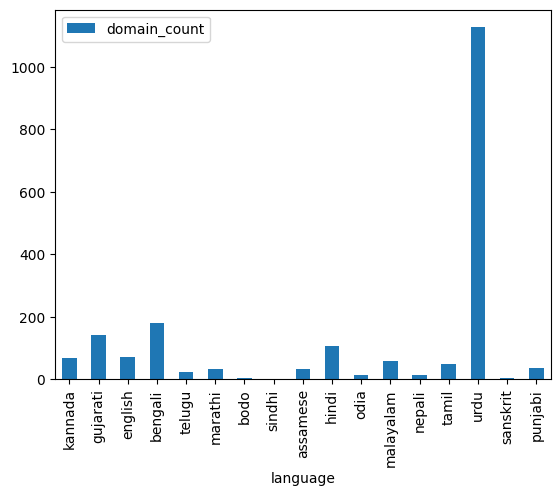

In [49]:
lang_stats_df.plot(kind="bar", x="language", y="domain_count")

<Axes: xlabel='language'>

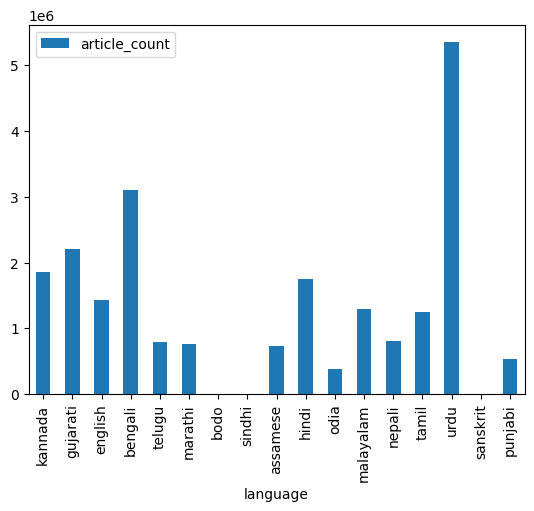

In [50]:
lang_stats_df.plot(kind="bar", x="language", y="article_count")

In [54]:
lang_stats_df.to_csv("./analysis/index_stats.csv", index=False)

In [1]:
import json

In [2]:
with open("../pipeline/language_identification/language_mapping.json") as lang_map_f:
    mapping = json.load(lang_map_f)

In [15]:
indiclid_set = []
cld3_set = []
nllb_set = []

for keys, vals in mapping["indiclid"].items():
    indiclid_set += [vals["language"]]

print(indiclid_set)

print(set(indiclid_set))

indiclid_set  = set(indiclid_set)

print(len(indiclid_set))

for keys, vals in mapping["cld3"].items():
    cld3_set += [vals["language"]]

print(cld3_set)

print(set(cld3_set))

cld3_set  = set(cld3_set)

print(len(cld3_set))

for keys, vals in mapping["nllb"].items():
    nllb_set += [vals["language"]]

print(nllb_set)

print(set(nllb_set))

nllb_set  = set(nllb_set)

print(len(cld3_set))

['Assamese', 'Assamese', 'Bangla', 'Bangla', 'Bodo', 'Bodo', 'Dogri', 'Dogri', 'English', 'Gujarati', 'Gujarati', 'Hindi', 'Hindi', 'Kannada', 'Kannada', 'Kashmiri', 'Kashmiri', 'Kashmiri', 'Konkani', 'Konkani', 'Maithili', 'Maithili', 'Malayalam', 'Malayalam', 'Manipuri', 'Manipuri', 'Manipuri', 'Marathi', 'Marathi', 'Nepali', 'Nepali', 'Oriya', 'Oriya', 'Punjabi', 'Punjabi', 'Sanskrit', 'Sanskrit', 'Santali', 'Sindhi', 'Sindhi', 'Tamil', 'Tamil', 'Telugu', 'Telugu', 'Urdu', 'Urdu', 'other']
{'Gujarati', 'Dogri', 'Konkani', 'Kashmiri', 'Tamil', 'Punjabi', 'Assamese', 'Telugu', 'Maithili', 'Malayalam', 'Nepali', 'Sindhi', 'Oriya', 'English', 'Sanskrit', 'Bangla', 'Manipuri', 'Hindi', 'other', 'Urdu', 'Marathi', 'Bodo', 'Santali', 'Kannada'}
24
['Afrikaans', 'Amharic', 'Arabic', 'Bulgarian', 'Bulgarian', 'Bangla', 'Bosnian', 'Catalan', 'Cebuano', 'Corsican', 'Czech', 'Welsh', 'Danish', 'German', 'Greek', 'Greek', 'English', 'Esperanto', 'Spanish', 'Estonian', 'Basque', 'Persian', 'Finni

In [18]:
final_set = indiclid_set.union(cld3_set).union(nllb_set)
print(sorted(list(final_set)))
print(len(final_set))

['Acehnese', 'Afrikaans', 'Akan', 'Albanian', 'Amharic', 'Arabic', 'Armenian', 'Assamese', 'Asturian', 'Awadhi', 'Ayacucho Quechua', 'Balinese', 'Bambara', 'Bangla', 'Banjar', 'Bashkir', 'Basque', 'Belarusian', 'Bemba', 'Bengali', 'Bhojpuri', 'Bodo', 'Bosnian', 'Buginese', 'Bulgarian', 'Burmese', 'Catalan', 'Cebuano', 'Central Atlas Tamazight', 'Central Aymara', 'Central Kanuri', 'Central Kurdish', 'Chhattisgarhi', 'Chinese', 'Chokwe', 'Corsican', 'Crimean Tatar', 'Croatian', 'Czech', 'Danish', 'Dari', 'Dogri', 'Dutch', 'Dyula', 'Dzongkha', 'Eastern Panjabi', 'Eastern Yiddish', 'Egyptian', 'English', 'Esperanto', 'Estonian', 'Ewe', 'Faroese', 'Fijian', 'Filipino', 'Finnish', 'Fon', 'French', 'Friulian', 'Galician', 'Ganda', 'Georgian', 'German', 'Greek', 'Guarani', 'Gujarati', 'Haitian Creole', 'Halh Mongolian', 'Hausa', 'Hawaiian', 'Hebrew', 'Hindi', 'Hmong', 'Hungarian', 'Icelandic', 'Igbo', 'Ilocano', 'Indonesian', 'Irish', 'Italian', 'Japanese', 'Javanese', 'Jingpho', 'Kabiyè', 'Ka

In [108]:
from pyspark.sql import SparkSession
from pyspark import TaskContext
from pyspark.sql.functions import map_concat, count, posexplode, udf, concat_ws, collect_list, asc
from operator import add
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, MapType, ArrayType

In [2]:
spark = SparkSession \
        .builder \
        .appName("Convert JSONs to Parquet") \
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/19 19:08:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
sc = spark.sparkContext

In [84]:
# data = [
#     ("36636",{"Finance": 1, "Sales": 2}),
#     ("36636",{"Finance": 1, "Sales": 2}), 
#     ("36636",{"Finance": 1, "Sales": 2}), 
#     ("40288",{"Finance": 1, "Sales": 2}), 
#     ("42114",{"Finance": 1, "Sales": 2}), 
#     ("39192",{"Finance": 1, "Sales": 2}), 
#     ("34534",{"Finance": 1, "Sales": 2}) 
# ]
# schema = StructType([
#     StructField('id', StringType(), True),
#     StructField('dists', MapType(StringType(), IntegerType()), True),
# ])

# def list_len(arr):
#     return len(arr)

# list_len_udf = udf(list_len, IntegerType())

# data = [
#     ("36636",["Finance", "Sales"]),
#     ("36636",["Finance", "Sales"]), 
#     ("36636",["Finance", "Sales"]), 
#     ("40288",["Finance", "Sales"]), 
#     ("42114",["Finance", "Sales"]), 
#     ("39192",["Finance", "Sales"]), 
#     ("34534",["Finance", "Sales"]) 
# ]
# schema = StructType([
#     StructField('id', StringType(), True),
#     StructField('dists', ArrayType(StringType()), True),
# ])

def list_len(arr):
    return len(arr)

list_len_udf = udf(list_len, IntegerType())

data = [
    ("36636", 0, "F"), 
    ("36636", 2, "a"),
    ("36636", 1,"Finance"), 
    ("40288", 0,"m"), 
    ("42114", 0,"c"), 
    ("39192", 0,"q"), 
    ("34534", 0,"z") 
]
schema = StructType([
    StructField('id', StringType(), True),
    StructField('pos', IntegerType(), True),
    StructField('dists', StringType(), True),
])

df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show(truncate=False)

root
 |-- id: string (nullable = true)
 |-- pos: integer (nullable = true)
 |-- dists: string (nullable = true)

+-----+---+-------+
|id   |pos|dists  |
+-----+---+-------+
|36636|0  |F      |
|36636|2  |a      |
|36636|1  |Finance|
|40288|0  |m      |
|42114|0  |c      |
|39192|0  |q      |
|34534|0  |z      |
+-----+---+-------+



In [85]:
df = df.repartition(7)

In [86]:
df.rdd.getNumPartitions()

7

In [87]:
df = df \
    .groupby("id") \
    .agg(concat_ws(" ", sort(collect_list("dists"))).alias("new")) \
    .sort("pos") \
    .show()

AttributeError: 'GroupedData' object has no attribute 'sort'

In [67]:
df = df.withColumn("list_len", list_len_udf("dists"))

In [68]:
df.rdd.getNumPartitions()

7

In [62]:
df = df.select("*", posexplode("dists")).drop("dists").withColumnRenamed("col", "dists")

TypeError: DataFrame.withColumn() missing 1 required positional argument: 'col'

In [30]:
#Convert columns to Map
from pyspark.sql.functions import col,lit,create_map, collect_list, expr, udf
from pyspark.sql.functions import col, expr, map_concat, map_from_arrays

def merge(arr):
        arr_dict = {}
        for mapp in arr:
                for key, val in mapp.items():
                        arr_dict[key] = arr_dict.get(key, 0) + val
        return arr_dict

merge_udf = udf(merge, MapType(StringType(), IntegerType()))

# df2 = df.groupBy("id") \
#         .agg(collect_list("dists").alias("dists")) \
#         .withColumn("nsfw_dist", merge_udf("dists"))

df2 = df.select("*")


In [60]:
df.rdd.getNumPartitions()

7

In [61]:
df.show()

+-----+---+-------+
|   id|pos|  dists|
+-----+---+-------+
|36636|  0|Finance|
|36636|  1|  Sales|
|34534|  0|Finance|
|34534|  1|  Sales|
|39192|  0|Finance|
|39192|  1|  Sales|
|36636|  0|Finance|
|36636|  1|  Sales|
|40288|  0|Finance|
|40288|  1|  Sales|
|42114|  0|Finance|
|42114|  1|  Sales|
|36636|  0|Finance|
|36636|  1|  Sales|
+-----+---+-------+



In [24]:
df.repartition(1).rdd.getNumPartitions()

1

In [55]:
df2.rdd.getNumPartitions()

7

In [26]:
df2.select("id", "map").show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `map` cannot be resolved. Did you mean one of the following? [`id`, `dists`, `nsfw_dist`].;
'Project [id#13, 'map]
+- Project [id#13, dists#90, merge(dists#90)#93 AS nsfw_dist#94]
   +- Aggregate [id#13], [id#13, collect_list(dists#14, 0, 0) AS dists#90]
      +- LogicalRDD [id#13, dists#14], false


In [11]:
df.select(map_concat("map1", "map2").alias("map3")).show(truncate=False)

+------------------------+
|map3                    |
+------------------------+
|{a -> 1, b -> 2, c -> 3}|
+------------------------+



In [ ]:
df.select("propertiesMap").rdd.reduceByKey(add).collect()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, map_concat

# Create a Spark session
spark = SparkSession.builder.appName("MapAggregation").getOrCreate()

# Sample data in the given format
data = [
    (42114, [{"Sales": 1}]),
    (40288, [{"Finance": 1}]),
    (39192, [{"Marketing": 1}]),
    (34534, [{"Sales": 1}]),
    (36636, [{"Finance": 1}, {"Sales": 2}]),
]

# Create a DataFrame with the sample data
asd_df = spark.createDataFrame(data, ["id", "dist"])

# Convert the list of maps into a single map using 'transform' and 'map_concat'
single_map_df = asd_df.withColumn("dist", expr("map_concat(*transform(dist, (x, i) -> map(x)))"))

# Show the result
single_map_df.show(truncate=False)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, expr, map_from_entries

# Create a Spark session
spark = SparkSession.builder.appName("MapAggregation").getOrCreate()

# Sample data in the given format
data = [
    (42114, [{"Sales": 1}]),
    (40288, [{"Finance": 1}]),
    (39192, [{"Marketing": 1}]),
    (34534, [{"Sales": 1}]),
    (36636, [{"Finance": 1}, {"Sales": 2}]),
]

# Create a DataFrame with the sample data
df = spark.createDataFrame(data, ["id", "dist"])

# Explode the 'dist' array to create individual rows for each map entry
exploded_df = df.select("id", explode("dist").alias("map_entry"))

# Extract key-value pairs from the 'map_entry' column
key_value_df = exploded_df.select(
    "id", expr("map_entry.keys[0]").alias("key"), expr("map_entry.values[0]").alias("value")
)

# # Group by 'id' and aggregate key-value pairs into a single map using 'map_from_entries'
# single_map_df = key_value_df.groupBy("id").agg(map_from_entries(expr("collect_list(struct(key, value))")).alias("dist"))

# # Show the result
# single_map_df.show(truncate=False)

In [1]:
import argparse
import os
from typing import Dict, Iterable, List, Tuple
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
from pyspark import SparkContext, TaskContext
import json
import time
import pyarrow as pa
import pyarrow.parquet as pq
from functools import partial
import math
import trafilatura

In [6]:
def analyze_parquets(df):
    df = df.filter(df.successful_extraction == False)
    df.select("url").show(truncate=False)
    print(f"Total Document with failed extraction: {df.count()}")
    return df

In [7]:
if __name__ == "__main__":

    PATH = "~/../../../../datasets/sangraha/parquets-trafilatura/*/*"

    spark: SparkSession = SparkSession \
                            .builder \
                            .master("local") \
                            .appName("Data Pipeline") \
                            .getOrCreate()

    sc = spark.sparkContext

    df = spark.read.parquet(PATH)

    df_len = df.count()

    n_splits = math.ceil(df_len/200000)

    df = df.repartition(n_splits)
    
    print(f"Repartitioned the data into - {n_splits} partitions")

    print("Starting analysis....")

    start = time.time()

    _ = analyze_parquets(df)

    end = time.time() - start

    print("Converted malayalam to parquet in ...... ", end)

    spark.stop()

Repartitioned the data into - 33 partitions
Starting analysis....


+-------------------------------------------------------------------------------------------------------------------------------------------+
|url                                                                                                                                        |
+-------------------------------------------------------------------------------------------------------------------------------------------+
|https://www.mediaoneonline.com/h-pdf-viewer?url=https://www.mediaoneonline.com/pdf_upload/kerala-link-uk-local-election-special-1367391.pdf|
|http://pravasionline.com/adclick?pagename=listnews.php&bannerid=359&target=http%3A%2F%2Fwww.ktalk.co.uk                                    |
|https://www.livenewage.com/calendar/list/page/17/?tribe-bar-date=2023-07-04&ical=1                                                         |
|https://www.livenewage.com/calendar/list/page/7/?tribe-bar-date=2023-05-31&eventDisplay=past&ical=1                                        |
|https

Total Document with failed extraction: 16403
Converted malayalam to parquet in ......  6.728627443313599


In [111]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.functions import col, expr, map_concat, collect_list

# Create a Spark session
spark = SparkSession.builder.appName("MapAggregation").getOrCreate()

# Sample data in the given format
data = [
    (132  ,1   ,"Lucy"),
    (132  ,2   ,"John"),
    (132  ,0   ,"Sam"),
    (78   ,2   ,"Kate"),
    (78   ,0   ,"Julia"),
    (78   ,1   ,"Vivien"),
    (245  ,0   ,"Tom")
]

# Create a DataFrame with the sample data
df = spark.createDataFrame(data, ["id", "pos", "text"])

In [112]:
df.show()

+---+---+------+
| id|pos|  text|
+---+---+------+
|132|  1|  Lucy|
|132|  2|  John|
|132|  0|   Sam|
| 78|  2|  Kate|
| 78|  0| Julia|
| 78|  1|Vivien|
|245|  0|   Tom|
+---+---+------+



In [113]:
def concat_strings(idx, partition, text_column, identifier_column, sort_column, join_symbol):
    doc_string = ""
    lines_from_single_docs = False
    previous_id_val = -1
    for i, line_row in enumerate(partition):
        if i == 0:
            previous_id_val = line_row[identifier_column]
        elif previous_id_val != line_row[identifier_column]:
            raise Exception("Partitioning not performed properly")

        doc_string += line_row[text_column] + join_symbol

    return doc_string.strip(join_symbol)

In [116]:
columns = ["pos", "text"]
join_symbol = " "
join_lines = f.udf(lambda x: join_symbol.join([line.text for line in x ]), StringType())
df2 = df \
        .withColumn("text", f.struct(columns)).select("id", "text") \
        .groupBy("id") \
        .agg(collect_list("text").alias("text")) \
        .withColumn(
            "text",
            f.expr(
                "array_sort(transform(text,x->struct(x['pos'] as pos,x['text'] as text)))"
            )   
        ) \
        .withColumn("text", join_lines("text"))
        

In [117]:
df2.show()

+---+-----------------+
| id|             text|
+---+-----------------+
|132|    Sam Lucy John|
| 78|Julia Vivien Kate|
|245|              Tom|
+---+-----------------+



# Parquet Check

In [1]:
import pandas as pd
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.functions import col, expr, map_concat, collect_list

# Create a Spark session
spark = SparkSession.builder.appName("MapAggregation").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/31 08:23:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.parquet("/mnt/phallm-data/datasets/sangraha/parquets-trafilatura/malayalam/0.parquet")

In [6]:
df.show(n=1)

+--------------------+--------------------+--------------+--------------+---------+--------------------+---------------------+--------------------+-----------+--------------------+--------+-------------+--------+--------+----------+----------+----+-----------+----+-------+----+------------+--------+-----+--------+
|              doc_id|                 url|        source|     timestamp| language|          local_path|successful_extraction|               title|description|                text|comments|       author|hostname|sitename|      date|categories|tags|fingerprint|  id|license|body|commentsbody|raw_text|image|pagetype|
+--------------------+--------------------+--------------+--------------+---------+--------------------+---------------------+--------------------+-----------+--------------------+--------+-------------+--------+--------+----------+----------+----+-----------+----+-------+----+------------+--------+-----+--------+
|93dd6b95b4e951593...|https://www.chand...|chandrika

In [7]:
df = df.select("*")

In [1]:
from indicnlp.tokenize.sentence_tokenize import sentence_split

In [10]:
a = """પરત ફરવાની હજુ તક, નહિંતર ત્રણ મહિનામાં આખી રમત બદલી નાખીશ”: શરદ પવારની અજીત જૂથને ચેતવણી
NCP નેતા અજીત પવારના બળવા બાદ મહારાષ્ટ્રમાં રાજકીય ઉથલપાથલ મચી ગઈ છે. અજીત પવાર અને NCPના 8 ધારાસભ્યો મહારાષ્ટ્રની એકનાથ ...
અજીત પવાર એકનાથ શિંદેવાળી કરશે? ધારાસભ્યોને ક્યાં લઈ જશે? સુરત, ગોવા કે ગુવાહાટી?
મહારાષ્ટ્રમાં સતત ગરબડ વચ્ચે રાષ્ટ્રવાદી કોંગ્રેસ પાર્ટી (NCP) પર વર્ચસ્વની લડાઈ તેજ થઈ ગઈ છે. એક તરફ શરદ પવારે અજીતના ...
મહારાષ્ટ્રમાં ભાજપે રમ્યો માસ્ટર સ્ટ્રોક રાજકીય ખેલમાં શિંદે પર લગામ, શરદ પવાર સહિત સમગ્ર વિપક્ષ નિષ્ફળ
મહારાષ્ટ્રના રાજકારણમાં રવિવારે ભૂકંપ આવી ગયો જ્યારે NCP નેતા અજિત પવાર એક ડઝન જેટલા ધારાસભ્યો સાથે અચાનક NDAમાં સામેલ થઈ ..."""

In [11]:
a.split("\n")

['પરત ફરવાની હજુ તક, નહિંતર ત્રણ મહિનામાં આખી રમત બદલી નાખીશ”: શરદ પવારની અજીત જૂથને ચેતવણી',
 'NCP નેતા અજીત પવારના બળવા બાદ મહારાષ્ટ્રમાં રાજકીય ઉથલપાથલ મચી ગઈ છે. અજીત પવાર અને NCPના 8 ધારાસભ્યો મહારાષ્ટ્રની એકનાથ ...',
 'અજીત પવાર એકનાથ શિંદેવાળી કરશે? ધારાસભ્યોને ક્યાં લઈ જશે? સુરત, ગોવા કે ગુવાહાટી?',
 'મહારાષ્ટ્રમાં સતત ગરબડ વચ્ચે રાષ્ટ્રવાદી કોંગ્રેસ પાર્ટી (NCP) પર વર્ચસ્વની લડાઈ તેજ થઈ ગઈ છે. એક તરફ શરદ પવારે અજીતના ...',
 'મહારાષ્ટ્રમાં ભાજપે રમ્યો માસ્ટર સ્ટ્રોક રાજકીય ખેલમાં શિંદે પર લગામ, શરદ પવાર સહિત સમગ્ર વિપક્ષ નિષ્ફળ',
 'મહારાષ્ટ્રના રાજકારણમાં રવિવારે ભૂકંપ આવી ગયો જ્યારે NCP નેતા અજિત પવાર એક ડઝન જેટલા ધારાસભ્યો સાથે અચાનક NDAમાં સામેલ થઈ ...']

In [8]:
sentence_split(a, "guj")

['અજીત પવારને ઝટકો,વધુ બે ધારાસભ્ચોનો યુટર્ન, છોડ્યો અજિત પવારનો સાથ\nમહારાષ્ટ્રમાં રવિવારે થયેલાં હાઈ વોલ્ટેજ રાજકીય ડ્રામા બાદ યુ-ટર્નની મોસમ ખીલી રહી છે.',
 'અમોલ કોલ્હે બાદ હવે વધુ એક વિધાનસભ્યએ . . . પવાર vs પવારઃ બળવો કરનારા અજીત પવાર, પ્રફૂલ્લ પટેલ સહિતનાં તમામ નેતાઓને NCPમાંથી બરતરફ કરાયા\nમહારાષ્ટ્રના રાજકારણમાં શિવસેના સાામે બળવો કરીને એકનાથ શિંદેએ સરકાર બનાવ્યાના એક વર્ષમાં ફરી વધુ એક વાર રાષ્ટ્રવાદી કોંગ્રેસ પાર્ટી (એનસીપી)માં .',
 '. .']